In [ ]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Installig pykan library

In [ ]:
pip install git+https://github.com/KindXiaoming/pykan.git

In [3]:
import torch
from kan import KAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df[list(df.columns.drop("Outcome"))[0:11]]
y = df["Outcome"]

In [8]:
# Splitting data to train val test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

# Converting data to Torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [9]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'val_input': val_input,
    'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

In [13]:
# Create model
model = KAN(width=[8, 2], grid=10, k=3)

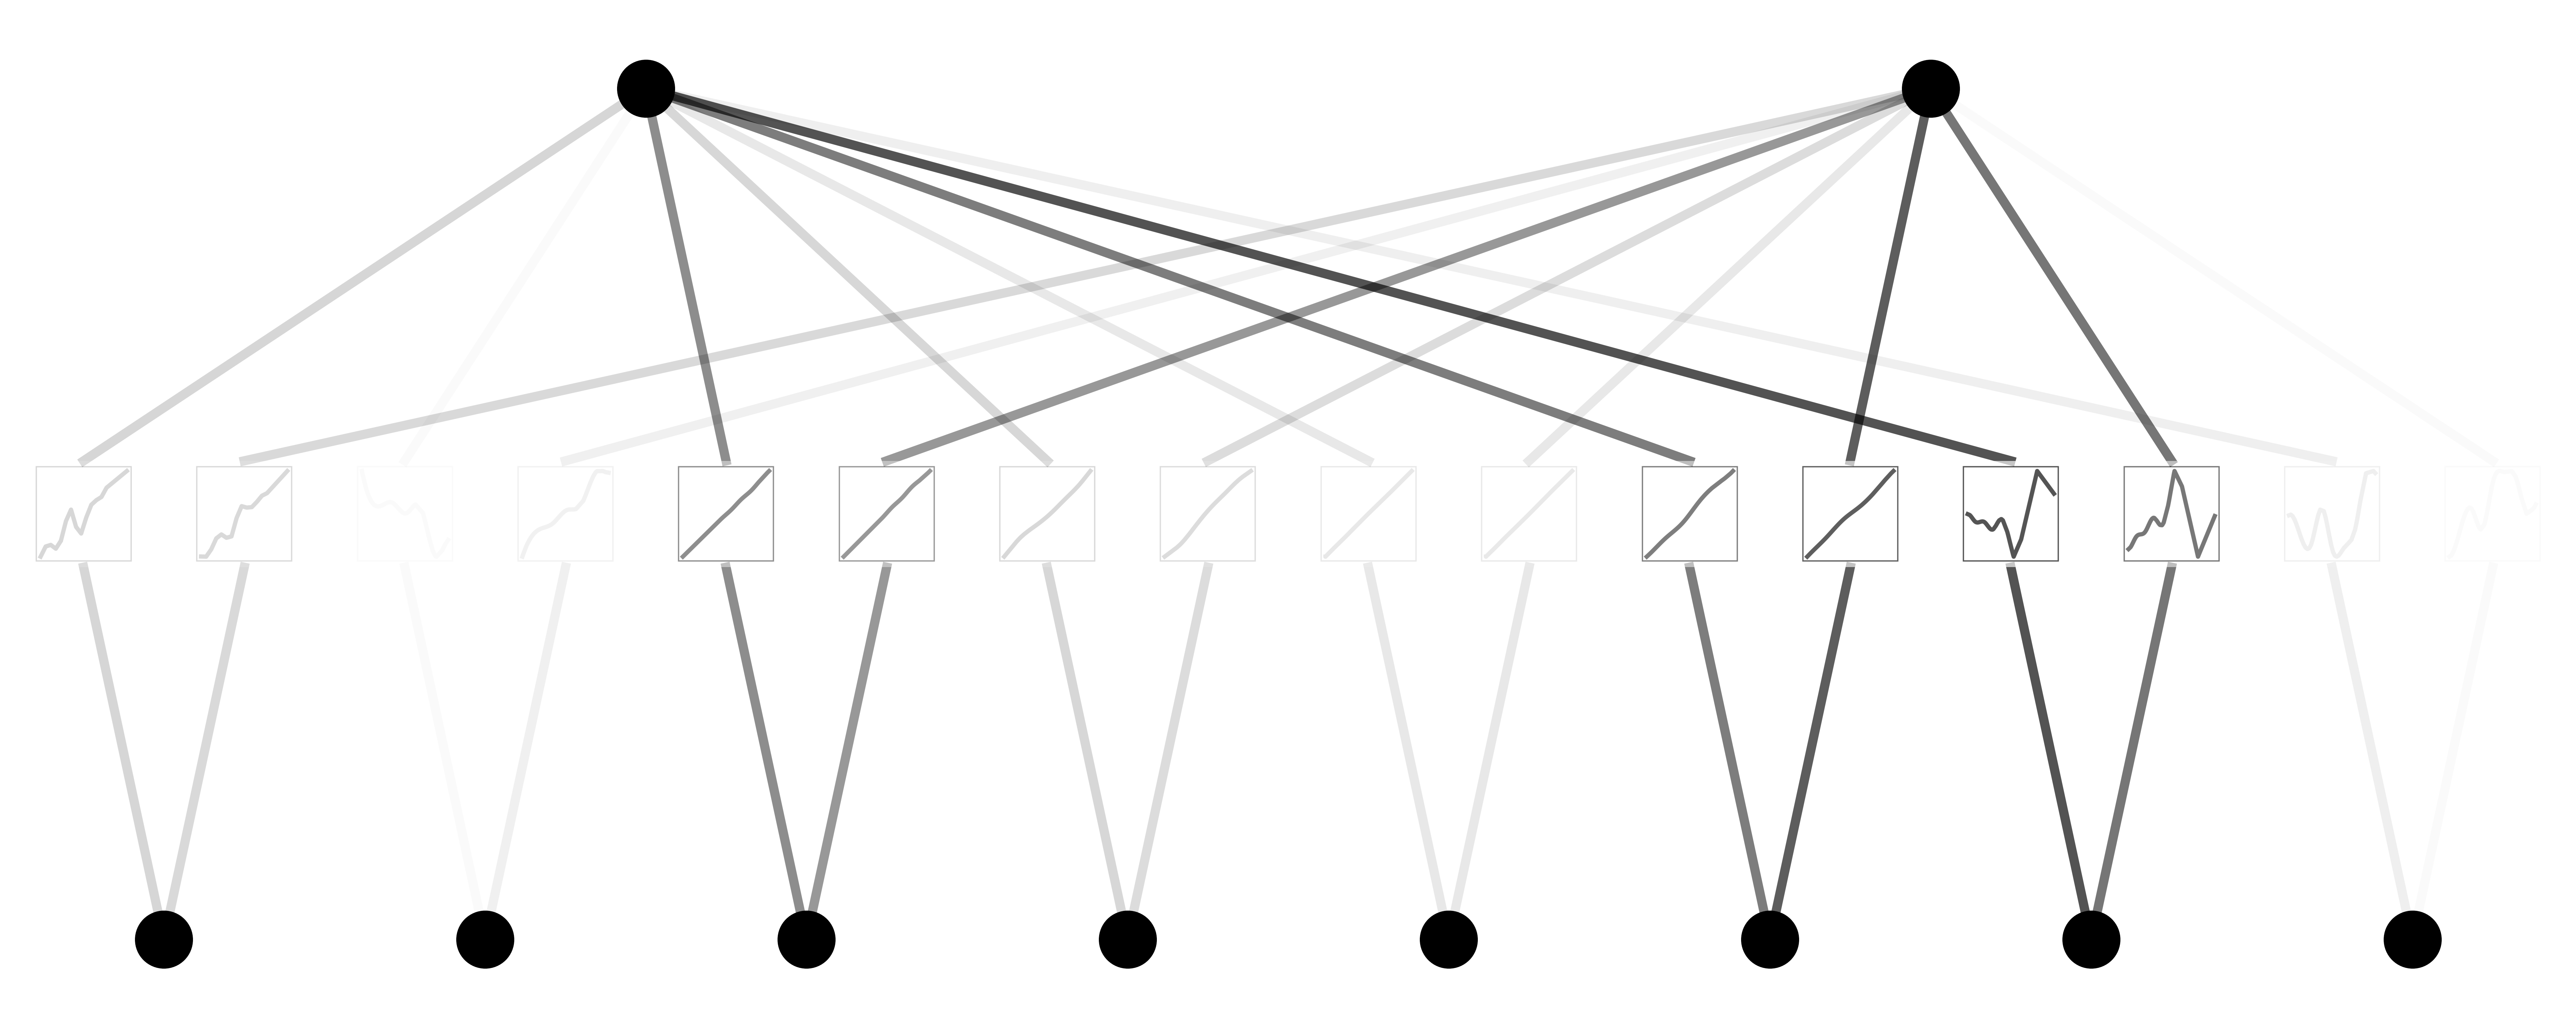

In [17]:
# Plotting KAN network
model.plot(scale=10)

In [14]:
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

In [15]:
# KAN model training
results = model.train({'train_input': train_input, 'train_label': train_label, 'test_input': val_input, 'test_label': val_label},
                      metrics=(train_acc, test_acc),
                      opt="LBFGS", steps=100, loss_fn=torch.nn.CrossEntropyLoss()) 

train loss: 6.16e-01 | test loss: 7.30e-01 | reg: 8.33e+00 : 100%|█| 100/100 [00:26<00:00,  3.73it/s


In [16]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model.forward(val_input).detach(),dim=1)
val_labels = val_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Val ACC:", accuracy_score(val_labels.numpy(), val_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

Train ACC: 0.8324022346368715
Val ACC: 0.7391304347826086
Test ACC: 0.7672413793103449


Could be improved